**Installing the Datasets Library:**

In [2]:
# This command installs the 'datasets' library, which provides easy access to datasets for training and evaluation.

!pip install datasets  # Installs the 'datasets' library for working with machine learning datasets

**Loading the Dataset abd Review Few Rows:**

In [3]:
# This block of code loads a healthcare dataset stored in a CSV file and displays the first few rows for inspection.

import pandas as pd  # Importing pandas library to work with data frames

# Load the Punjabi dataset
file_path = "/content/updated_result_with_AI_HINDI.csv"  # Path to the dataset CSV file
df = pd.read_csv(file_path)  # Reading the dataset from the file and storing it in a pandas DataFrame

# Check the first few rows
print(df.head())  # Display the first 5 rows of the dataset to get an overview of the data

   patient_id  age gender                              Diagnosis  \
0        1049   62  पुरुष   बाएं कूल्हे का अस्वास्कुलर नेक्रोसिस   
1        7622   61  महिला   बाएं कूल्हे का अस्वास्कुलर नेक्रोसिस   
2        8063   59  महिला   बाएं कूल्हे का अस्वास्कुलर नेक्रोसिस   
3        9737   21  पुरुष  दोनों कूल्हे का अस्वास्कुलर नेक्रोसिस   
4        4318   53  पुरुष  दोनों कूल्हे का अस्वास्कुलर नेक्रोसिस   

                          Remarks  doctor_id  \
0  अधिक मूल्यांकन की आवश्यकता है।       2504   
1   नियमित चेक-अप की आवश्यकता है।       5825   
2  अधिक मूल्यांकन की आवश्यकता है।       9898   
3   नियमित चेक-अप की आवश्यकता है।       3969   
4                  मरीज स्थिर है।       5984   

                                     Patient History  age_group  \
0  मरीज बाएं कूल्हे में निरंतर दर्द की शिकायत करत...          4   
1  एमआरआई ने बाएं कूल्हे में अस्वास्कुलर नेक्रोसि...          4   
2  बाएं कूल्हे में दर्द धीरे-धीरे शुरू हुआ, जिसमे...          3   
3  एमआरआई ने दोनों कूल्हे्स में अस

**Data Preprocessing: Cleaning and Combining Text Columns:**

In [4]:
import re  # Importing the 're' library for regular expressions to clean the text data.

def clean_column_hindi(column, default_value="कोई जानकारी नहीं दी गई"):
    column = column.fillna(default_value).astype(str).str.strip()  # Fill missing values with the default and strip whitespaces
    column = column.apply(lambda x: re.sub(r'[^\w\s]', '', x))  # Remove punctuation from the text
    column = column.apply(lambda x: re.sub(r'[^a-zA-Z0-9\u0900-\u097F\s]', '', x))  # Keep only Hindi characters, numbers, and spaces
    return column  # Return the cleaned column

# Apply preprocessing to relevant columns
df['Pseudonymized_Diagnosis'] = clean_column_hindi(df['Pseudonymized_Diagnosis'])  # Clean the 'Diagnosis' column
df['Pseudonymized_Patient History'] = clean_column_hindi(df['Pseudonymized_Patient History'])  # Clean the 'Patient History' column
df['Pseudonymized_symptoms'] = clean_column_hindi(df['Pseudonymized_symptoms'])  # Clean the 'symptoms' column
df['Pseudonymized_Diagnosis Category'] = clean_column_hindi(df['Pseudonymized_Diagnosis Category'])  # Clean the 'Diagnosis Category' column

# Combine text columns for model input
df['combined_text'] = df['Pseudonymized_Diagnosis'] + " " + df['Pseudonymized_Patient History'] + " " + df['Pseudonymized_symptoms']  # Concatenate the relevant text columns
df['combined_text'] = df['combined_text'].replace("", "कोई जानकारी नहीं दी गई")  # Replace empty strings with the default value


**Enhancing Hindi Text Data with Synonym-Based Augmentation:**

In [5]:
import random
import nltk
import pandas as pd
from nltk.corpus import wordnet

# Download NLTK WordNet data if not already downloaded
nltk.download('wordnet')
nltk.download('omw-1.4')  # Open Multilingual WordNet for Hindi support

# **Function to Get Hindi Synonyms**
def get_hindi_synonyms(word):
    synonyms = []
    try:
        for syn in wordnet.synsets(word, lang='hin'):  # Fetch Hindi synonyms from WordNet
            for lemma in syn.lemmas(lang='hin'):
                synonyms.append(lemma.name())  # Extract lemma names as synonyms
    except:
        return [word]  # If error occurs, return original word
    return synonyms if synonyms else [word]  # Return synonyms or the original word if none found

# **Hindi Synonym Augmentation Function**
def augment_hindi_text(text):
    words = text.split()
    augmented_text = []
    for word in words:
        synonyms = get_hindi_synonyms(word)  # Fetch Hindi synonyms
        augmented_text.append(random.choice(synonyms))  # Replace with a random synonym
    return ' '.join(augmented_text)

# **Example Usage**
hindi_text = "मुझे दर्द हो रहा है"
augmented_hindi_text = augment_hindi_text(hindi_text)
print("Original:", hindi_text)
print("Augmented:", augmented_hindi_text)



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Original: मुझे दर्द हो रहा है
Augmented: मुझे दर्द हो रहा है


**Loading the Tokenizer and Model for Sequence Classification:**

In [6]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification  # Import the necessary classes from Hugging Face's transformers library

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('ai4bharat/indic-bert')  # Load the pre-trained tokenizer for Indic-BERT model
model = AutoModelForSequenceClassification.from_pretrained('ai4bharat/indic-bert', num_labels=6)  # Load the pre-trained Indic-BERT model for sequence classification and set number of labels to 6


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/507 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/5.65M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/135M [00:00<?, ?B/s]

Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at ai4bharat/indic-bert and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**Encoding Target Labels for Classification:**

In [7]:
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder from scikit-learn to encode labels into numeric values

# Encode target labels
label_encoder = LabelEncoder()  # Initialize the LabelEncoder instance
df['target'] = label_encoder.fit_transform(df['Pseudonymized_Diagnosis Category'])  # Fit and transform the 'Diagnosis Category' column into numeric labels and assign it to the 'target' column

# Check encoded labels
print("Encoded Labels:", label_encoder.classes_)  # Print the classes/labels of the encoded target to verify the transformation




Encoded Labels: ['Unknown' 'अनय' 'कलह स सबधत वकर' 'मसकलसकलटल वकर' 'रढ स सबधत वकर'
 'हडड सबधत वकर']


**Label Correction and Printing Results:**




In [8]:
# **Correcting mislabeled Hindi categories**
correct_labels = {
    "Unknown": "अज्ञात",
    "अनय": "अन्य",
    "कलह स सबधत वकर": "कूल्हे से संबंधित विकार",
    "मसकलसकलटल वकर": "मस्कुलोस्केलेटल विकार",
    "रढ स सबधत वकर": "रीढ़ से संबंधित विकार",
    "हडड सबधत वकर": "हड्डी से संबंधित विकार",
}

df['Pseudonymized_Diagnosis Category'] = df['Pseudonymized_Diagnosis Category'].replace(correct_labels)

# **Encode labels using LabelEncoder**
label_encoder = LabelEncoder()
df['target'] = label_encoder.fit_transform(df['Pseudonymized_Diagnosis Category'])

# **Verify the final labels**
print(df['Pseudonymized_Diagnosis Category'].unique())  # Check unique values after correction


['कूल्हे से संबंधित विकार' 'अन्य' 'अज्ञात' 'हड्डी से संबंधित विकार'
 'मस्कुलोस्केलेटल विकार' 'रीढ़ से संबंधित विकार']


**Splitting and Preparing Dataset for Model Training:**

In [9]:
# **Splitting and Preparing Dataset for Model Training**

from sklearn.model_selection import train_test_split  # Import train_test_split function from scikit-learn to split the dataset into training and validation sets
from datasets import Dataset  # Import Dataset from Hugging Face's datasets library to easily handle datasets

# Split dataset into train and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['combined_text'], df['target'], test_size=0.2, random_state=42  # Split the combined_text and target columns into training (80%) and validation (20%) sets
)

# Tokenize the text
def tokenize_function(texts):  # Define a function to tokenize texts
    return tokenizer(texts.tolist(), padding="max_length", truncation=True, max_length=512)  # Tokenize the input texts, padding them to the max length of 512 and truncating longer texts

train_encodings = tokenize_function(train_texts)  # Tokenize the training texts
val_encodings = tokenize_function(val_texts)  # Tokenize the validation texts

# Prepare datasets
train_dataset = Dataset.from_dict({  # Create the train dataset from the tokenized training data
    'input_ids': train_encodings['input_ids'],  # Assign tokenized input IDs
    'attention_mask': train_encodings['attention_mask'],  # Assign attention masks for tokenization
    'labels': train_labels.tolist()  # Assign the target labels as 'labels' for the training dataset
})

val_dataset = Dataset.from_dict({  # Create the validation dataset from the tokenized validation data
    'input_ids': val_encodings['input_ids'],  # Assign tokenized input IDs
    'attention_mask': val_encodings['attention_mask'],  # Assign attention masks for tokenization
    'labels': val_labels.tolist()  # Assign the target labels as 'labels' for the validation dataset
})

**Computing Class Weights for Imbalanced Classes:**

In [10]:
from sklearn.utils.class_weight import compute_class_weight  # Import compute_class_weight from scikit-learn to calculate class weights for imbalanced classes
import numpy as np  # Import NumPy for numerical operations
import torch  # Import PyTorch for tensor operations

# Compute class weights
class_weights = compute_class_weight(
    class_weight="balanced",  # Set class_weight to "balanced" to automatically adjust weights based on class distribution
    classes=np.unique(df['target']),  # Get the unique classes (target labels) from the dataset
    y=df['target']  # Use the target labels to calculate the class weights
)
class_weights = torch.tensor(class_weights, dtype=torch.float)  # Convert the computed class weights into a PyTorch tensor with float data type



**Model Training with Custom Weighted Loss:**

In [11]:
from transformers import TrainingArguments, Trainer  # Import TrainingArguments and Trainer from Hugging Face for training the model

# Training arguments
training_args = TrainingArguments(
    output_dir="./results",  # Directory to save the model's output (checkpoints, predictions, etc.)
    eval_strategy="epoch",  # Evaluation strategy to be applied after each epoch
    save_strategy="epoch",  # Save model checkpoint after each epoch
    learning_rate=5e-5,  # Learning rate for the optimizer
    per_device_train_batch_size=8,  # Batch size for training per device
    per_device_eval_batch_size=8,  # Batch size for evaluation per device
    num_train_epochs=5,  # Number of epochs to train the model
    weight_decay=0.01,  # Weight decay for regularization to prevent overfitting
    logging_dir="./logs",  # Directory to save logs for tracking the training process
    report_to="none"  # Disable logging to `wandb` and other services (set to "none")
)

# Define custom trainer for weighted loss (if using class weights)
class WeightedTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        labels = inputs['labels']  # Get the labels from the input
        outputs = model(**inputs)  # Pass the inputs to the model
        logits = outputs.logits  # Get the predicted logits (model outputs)
        loss_fn = torch.nn.CrossEntropyLoss(weight=class_weights.to(logits.device))  # Define loss function with class weights for imbalanced classes
        loss = loss_fn(logits, labels)  # Compute the loss between predicted logits and actual labels
        return (loss, outputs) if return_outputs else loss  # Return loss and outputs if requested, else return only loss

# Initialize trainer
trainer = WeightedTrainer(
    model=model,  # The model to train
    args=training_args,  # The training arguments (parameters)
    train_dataset=train_dataset,  # The training dataset
    eval_dataset=val_dataset,  # The validation dataset
    tokenizer=tokenizer  # The tokenizer to encode the texts
)

# Train the model
trainer.train()  # Start training the model with the defined parameters


<ipython-input-11-2d2aa9a4def6>:28: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `WeightedTrainer.__init__`. Use `processing_class` instead.
  trainer = WeightedTrainer(


Epoch,Training Loss,Validation Loss
1,No log,0.254753
2,No log,0.156969
3,0.381700,0.166430
4,0.381700,0.102362
5,0.076900,0.083900


TrainOutput(global_step=1095, training_loss=0.2160740904612084, metrics={'train_runtime': 860.7132, 'train_samples_per_second': 10.137, 'train_steps_per_second': 1.272, 'total_flos': 208593384499200.0, 'train_loss': 0.2160740904612084, 'epoch': 5.0})

**Classification Report:**

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score

# Define human-readable label names corresponding to their encoded integer values
label_names = [


     "अज्ञात",
     "अन्य",
     "कूल्हे से संबंधित विकार",
    "मस्कुलोस्केलेटल विकार",
    "रीढ़ से संबंधित विकार",
     "हड्डी से संबंधित विकार",
]

# Get predictions on the validation set
predictions = trainer.predict(val_dataset)
predicted_labels = np.argmax(predictions.predictions, axis=1)  # Get predicted class labels
true_labels = val_dataset['labels']  # True labels

# Ensure the number of labels in the classification report matches the number of classes
labels_range = list(range(len(label_names)))

# Calculate accuracy, F1 score, and confusion matrix
accuracy = accuracy_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels, average='weighted')
classification_rep = classification_report(
    true_labels, predicted_labels, target_names=label_names, labels=labels_range, zero_division=0
)

# Print classification report
print("Classification Report:")
print(classification_rep)

Classification Report:
                         precision    recall  f1-score   support

                 अज्ञात       0.00      0.00      0.00         0
                   अन्य       1.00      0.95      0.97        40
कूल्हे से संबंधित विकार       1.00      1.00      1.00       256
  मस्कुलोस्केलेटल विकार       0.98      1.00      0.99        84
  रीढ़ से संबंधित विकार       1.00      1.00      1.00         8
 हड्डी से संबंधित विकार       1.00      1.00      1.00        49

               accuracy                           1.00       437
              macro avg       0.83      0.83      0.83       437
           weighted avg       1.00      1.00      1.00       437



**Confusion Matrix Plot:**

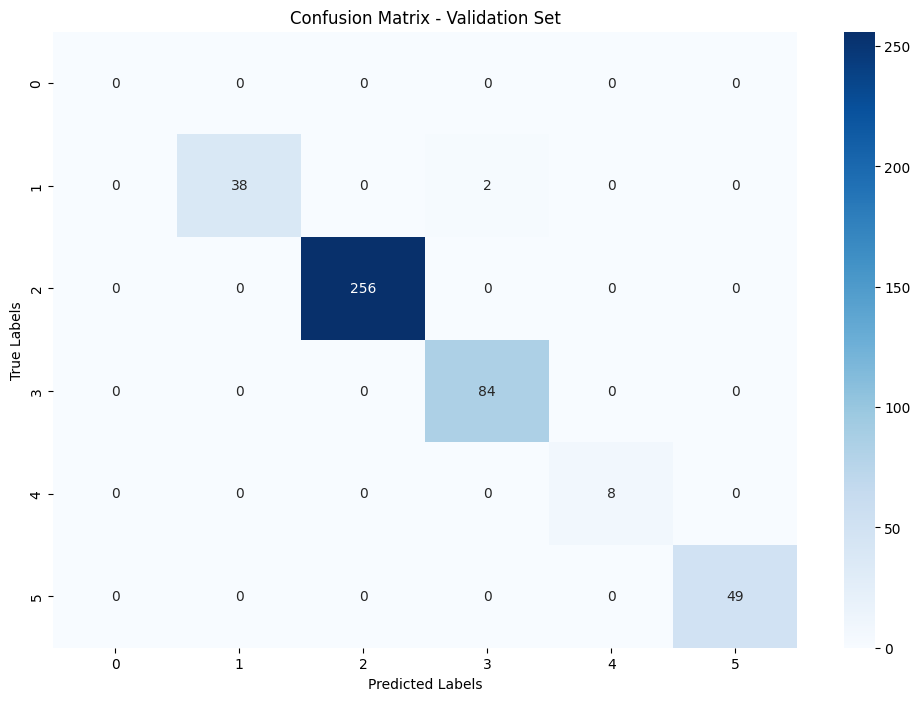

In [13]:
# Calculate confusion matrix with explicit labels to include all classes
cm = confusion_matrix(true_labels, predicted_labels, labels=labels_range)

# Plot the confusion matrix
plt.figure(figsize=(12, 8))  # Set figure size
sns.heatmap(
    cm,
    annot=True,  # Annotate each cell with the corresponding count
    fmt='d',  # Integer format for counts
    cmap='Blues',  # Color map
    xticklabels=labels_range,  # Label x-axis with numeric indices 0, 1, 2, 3, 4, 5
    yticklabels=labels_range  # Label y-axis with numeric indices 0, 1, 2, 3, 4, 5
)
plt.title('Confusion Matrix - Validation Set')  # Set plot title
plt.xlabel('Predicted Labels')  # Label for x-axis
plt.ylabel('True Labels')  # Label for y-axis
plt.show()  # Display the confusion matrix


**Train and Evaluate Model with k-5 Fold Validation And Display Result:**

In [14]:
# Import necessary libraries
from sklearn.model_selection import StratifiedKFold  # For stratified k-fold cross-validation
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix  # For evaluation metrics
import numpy as np  # For numerical operations
import torch  # For PyTorch operations
from transformers import Trainer, TrainingArguments, AutoTokenizer, AutoModelForSequenceClassification  # Transformers utilities
from datasets import Dataset  # For dataset creation



# Load pre-trained Indic-BERT tokenizer
tokenizer = AutoTokenizer.from_pretrained('ai4bharat/indic-bert')

# Load pre-trained Indic-BERT model for sequence classification with six labels
model = AutoModelForSequenceClassification.from_pretrained('ai4bharat/indic-bert', num_labels=6)

# Extract text data and labels from the DataFrame (ensure 'df' is already defined)
train_texts = df['combined_text']  # Input texts for training
train_labels = df['target']  # Target labels for classification

# Check if the 'combined_text' column exists; if not, create it by concatenating other relevant columns
if 'combined_text' not in df.columns:
    df['combined_text'] = df['Diagnosis'] + " " + df['Patient History'] + " " + df['symptoms']
    print("combined_text column created.")  # Notify that the column has been added

# Function to tokenize the input texts for the model
def tokenize_function(texts):
    return tokenizer(texts.tolist(), padding="max_length", truncation=True, max_length=512)

# Define human-readable label names corresponding to their encoded integer values
label_names = [
    "अज्ञात",
    "अन्य",
    "कूल्हे से संबंधित विकार",
    "मस्कुलोस्केलेटल विकार",
    "रीढ़ से संबंधित विकार",
    "हड्डी से संबंधित विकार",
]
# Set up stratified k-fold cross-validation with 5 splits
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize an empty list to store results for each fold
fold_results = []

# Start cross-validation loop
for fold, (train_index, val_index) in enumerate(skf.split(train_texts, train_labels)):
    print(f"***** Fold {fold + 1} *****")  # Display current fold number

    # Split the data into training and validation sets for the current fold
    train_texts_fold = train_texts.iloc[train_index]
    val_texts_fold = train_texts.iloc[val_index]
    train_labels_fold = train_labels.iloc[train_index]
    val_labels_fold = train_labels.iloc[val_index]

    # Tokenize the training and validation texts
    train_encodings = tokenize_function(train_texts_fold)
    val_encodings = tokenize_function(val_texts_fold)

    # Convert the tokenized data into a Dataset format suitable for the Trainer API
    train_dataset = Dataset.from_dict({
        'input_ids': train_encodings['input_ids'],
        'attention_mask': train_encodings['attention_mask'],
        'labels': train_labels_fold.tolist()
    })
    val_dataset = Dataset.from_dict({
        'input_ids': val_encodings['input_ids'],
        'attention_mask': val_encodings['attention_mask'],
        'labels': val_labels_fold.tolist()
    })

    # Set training arguments for the current fold
    training_args = TrainingArguments(
        output_dir=f"./results_fold{fold + 1}",  # Directory for saving fold-specific outputs
        eval_strategy="epoch",  # Evaluate the model after every epoch
        save_strategy="epoch",  # Save the model after every epoch
        learning_rate=5e-5,  # Learning rate for optimization
        per_device_train_batch_size=8,  # Training batch size
        per_device_eval_batch_size=8,  # Evaluation batch size
        num_train_epochs=5,  # Number of epochs to train
        weight_decay=0.01,  # Weight decay to prevent overfitting
        logging_dir=f"./logs_fold{fold + 1}",  # Directory for storing logs
        report_to="none",  # Disable reporting to external services (e.g., WandB)
    )

    # Define a custom Trainer class to compute weighted loss
    class WeightedTrainer(Trainer):
        def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
            labels = inputs['labels']  # Extract labels from inputs
            outputs = model(**inputs)  # Get model outputs
            logits = outputs.logits  # Extract logits from outputs
            loss_fn = torch.nn.CrossEntropyLoss(weight=class_weights.to(logits.device))  # Define weighted loss function
            loss = loss_fn(logits, labels)  # Compute loss
            return (loss, outputs) if return_outputs else loss  # Return loss and outputs if specified

        def _save(self, output_dir=None, state_dict=None):
            """
            Save model state with contiguous tensors to avoid issues with non-contiguous tensors.
            """
            if state_dict is None:
                state_dict = self.model.state_dict()  # Get model state dictionary

            # Ensure all tensors in the state dictionary are contiguous
            for key, value in state_dict.items():
                if isinstance(value, torch.Tensor) and not value.is_contiguous():
                    state_dict[key] = value.contiguous()

            super()._save(output_dir=output_dir, state_dict=state_dict)  # Call parent class save method

    # Initialize the Trainer with model, arguments, datasets, and tokenizer
    trainer = WeightedTrainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        tokenizer=tokenizer,
    )

    # Train the model for the current fold
    trainer.train()

    # Evaluate the model on the validation set
    eval_result = trainer.evaluate()

    # Get predictions on the validation set
    predictions = trainer.predict(val_dataset)
    predicted_labels = np.argmax(predictions.predictions, axis=1)  # Get predicted class labels


    # Calculate accuracy and weighted F1 score for the current fold
    accuracy = accuracy_score(val_labels_fold, predicted_labels)
    f1 = f1_score(val_labels_fold, predicted_labels, average='weighted')
    train_loss = eval_result["eval_loss"]  # Training loss
    val_loss = eval_result["eval_loss"]  # Validation loss

    # Append fold-specific results to the results list
    fold_results.append({
        "fold": fold + 1,  # Current fold number
        "accuracy": accuracy,  # Accuracy for the fold
        "f1": f1,  # F1 score for the fold
        "classification_report": classification_report(
            val_labels_fold, predicted_labels, target_names=label_names, labels=range(len(label_names)), zero_division=0
        ),
        "confusion_matrix": confusion_matrix(val_labels_fold, predicted_labels, labels=range(len(label_names)))
    })

    # Print training and validation metrics
    print(f"Training Loss: {train_loss:.4f}")
    print(f"Validation Loss: {val_loss:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Classification Report for Fold {fold + 1}:\n")
    print(fold_results[-1]["classification_report"])

    # Plot and display the confusion matrix
    #cm = fold_results[-1]["confusion_matrix"]
    #plt.figure(figsize=(10, 8))  # Set figure size
    #sns.heatmap(
       # cm,
        #annot=True,
       # fmt='d',
       # cmap='Blues',
       # xticklabels=range(len(label_names)),  # Label x-axis with class indices
        #yticklabels=range(len(label_names))  # Label y-axis with class indices
    #)
    #plt.title(f'Confusion Matrix - Fold {fold + 1}')  # Set plot title
    #plt.xlabel('Predicted Labels')  # Label for x-axis
   # plt.ylabel('Actual Labels')  # Label for y-axis
   # plt.show()  # Display the confusion matrix


Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at ai4bharat/indic-bert and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


***** Fold 1 *****


<ipython-input-14-7c3ee520e640>:110: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `WeightedTrainer.__init__`. Use `processing_class` instead.
  trainer = WeightedTrainer(


Epoch,Training Loss,Validation Loss
1,No log,0.092060
2,No log,0.029208
3,0.430900,0.030211
4,0.430900,0.029714
5,0.058200,0.028012


Training Loss: 0.0280
Validation Loss: 0.0280
Accuracy: 0.9954
F1 Score: 0.9954
Classification Report for Fold 1:

                         precision    recall  f1-score   support

                 अज्ञात       0.00      0.00      0.00         0
                   अन्य       1.00      0.95      0.97        39
कूल्हे से संबंधित विकार       1.00      1.00      1.00       252
  मस्कुलोस्केलेटल विकार       0.98      1.00      0.99        79
  रीढ़ से संबंधित विकार       1.00      1.00      1.00         7
 हड्डी से संबंधित विकार       1.00      1.00      1.00        60

               accuracy                           1.00       437
              macro avg       0.83      0.82      0.83       437
           weighted avg       1.00      1.00      1.00       437

***** Fold 2 *****


<ipython-input-14-7c3ee520e640>:110: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `WeightedTrainer.__init__`. Use `processing_class` instead.
  trainer = WeightedTrainer(


Epoch,Training Loss,Validation Loss
1,No log,0.234306
2,No log,0.237916
3,0.115700,0.225143
4,0.115700,0.194668
5,0.043400,0.198330


Training Loss: 0.1983
Validation Loss: 0.1983
Accuracy: 0.9954
F1 Score: 0.9943
Classification Report for Fold 2:

                         precision    recall  f1-score   support

                 अज्ञात       0.00      0.00      0.00         1
                   अन्य       0.97      0.97      0.97        39
कूल्हे से संबंधित विकार       1.00      1.00      1.00       251
  मस्कुलोस्केलेटल विकार       0.99      1.00      0.99        79
  रीढ़ से संबंधित विकार       1.00      1.00      1.00         7
 हड्डी से संबंधित विकार       1.00      1.00      1.00        60

               accuracy                           1.00       437
              macro avg       0.83      0.83      0.83       437
           weighted avg       0.99      1.00      0.99       437

***** Fold 3 *****


<ipython-input-14-7c3ee520e640>:110: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `WeightedTrainer.__init__`. Use `processing_class` instead.
  trainer = WeightedTrainer(


Epoch,Training Loss,Validation Loss
1,No log,0.116092
2,No log,0.078542
3,0.106900,0.069748
4,0.106900,0.031075
5,0.054800,0.049820


Training Loss: 0.0498
Validation Loss: 0.0498
Accuracy: 0.9908
F1 Score: 0.9908
Classification Report for Fold 3:

                         precision    recall  f1-score   support

                 अज्ञात       0.00      0.00      0.00         0
                   अन्य       0.95      0.95      0.95        39
कूल्हे से संबंधित विकार       1.00      1.00      1.00       251
  मस्कुलोस्केलेटल विकार       1.00      0.97      0.99        80
  रीढ़ से संबंधित विकार       1.00      1.00      1.00         6
 हड्डी से संबंधित विकार       0.97      1.00      0.98        60

               accuracy                           0.99       436
              macro avg       0.82      0.82      0.82       436
           weighted avg       0.99      0.99      0.99       436

***** Fold 4 *****


<ipython-input-14-7c3ee520e640>:110: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `WeightedTrainer.__init__`. Use `processing_class` instead.
  trainer = WeightedTrainer(


Epoch,Training Loss,Validation Loss
1,No log,0.011953
2,No log,0.007429
3,0.167500,0.028191
4,0.167500,0.029049
5,0.047800,0.030096


Training Loss: 0.0301
Validation Loss: 0.0301
Accuracy: 0.9954
F1 Score: 0.9954
Classification Report for Fold 4:

                         precision    recall  f1-score   support

                 अज्ञात       0.00      0.00      0.00         0
                   अन्य       1.00      0.95      0.97        39
कूल्हे से संबंधित विकार       1.00      1.00      1.00       251
  मस्कुलोस्केलेटल विकार       0.99      1.00      0.99        80
  रीढ़ से संबंधित विकार       0.86      1.00      0.92         6
 हड्डी से संबंधित विकार       1.00      1.00      1.00        60

               accuracy                           1.00       436
              macro avg       0.81      0.82      0.82       436
           weighted avg       1.00      1.00      1.00       436

***** Fold 5 *****


<ipython-input-14-7c3ee520e640>:110: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `WeightedTrainer.__init__`. Use `processing_class` instead.
  trainer = WeightedTrainer(


Epoch,Training Loss,Validation Loss
1,No log,0.000096
2,No log,0.000619
3,0.151000,0.000297
4,0.151000,0.000150
5,0.057200,0.000135


Training Loss: 0.0001
Validation Loss: 0.0001
Accuracy: 1.0000
F1 Score: 1.0000
Classification Report for Fold 5:

                         precision    recall  f1-score   support

                 अज्ञात       0.00      0.00      0.00         0
                   अन्य       1.00      1.00      1.00        39
कूल्हे से संबंधित विकार       1.00      1.00      1.00       251
  मस्कुलोस्केलेटल विकार       1.00      1.00      1.00        79
  रीढ़ से संबंधित विकार       1.00      1.00      1.00         7
 हड्डी से संबंधित विकार       1.00      1.00      1.00        60

               accuracy                           1.00       436
              macro avg       0.83      0.83      0.83       436
           weighted avg       1.00      1.00      1.00       436



**Classification Report With Average Accuracy:**

In [15]:
import numpy as np

# Define human-readable label names corresponding to their encoded integer values
label_names = [

    "अज्ञात",
    "अन्य",
    "कूल्हे से संबंधित विकार",
    "मस्कुलोस्केलेटल विकार",
    "रीढ़ से संबंधित विकार",
    "हड्डी से संबंधित विकार",
]
# Assume `fold_results` is a list of dictionaries containing fold-specific metrics
# Each entry contains a confusion matrix, accuracy, and classification report
# Example structure:
# fold_results = [
#     {
#         "classification_report": classification_report(y_true, y_pred, target_names=label_names, zero_division=0),
#         "accuracy": accuracy_score(y_true, y_pred),
#         "confusion_matrix": confusion_matrix(y_true, y_pred, labels=range(len(label_names)))
#     },
#     ...
# ]

# Optional: Print classification reports for each fold
for fold, result in enumerate(fold_results):
    print(f"Classification Report for Fold {fold + 1}")
    print(result["classification_report"])  # Includes human-readable labels

# Summarize results across all folds
accuracies = [result["accuracy"] for result in fold_results]

print("\nSummary Across Folds:")
print(f"Average Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")  # Mean ± Std Dev of Accuracy


Classification Report for Fold 1
                         precision    recall  f1-score   support

                 अज्ञात       0.00      0.00      0.00         0
                   अन्य       1.00      0.95      0.97        39
कूल्हे से संबंधित विकार       1.00      1.00      1.00       252
  मस्कुलोस्केलेटल विकार       0.98      1.00      0.99        79
  रीढ़ से संबंधित विकार       1.00      1.00      1.00         7
 हड्डी से संबंधित विकार       1.00      1.00      1.00        60

               accuracy                           1.00       437
              macro avg       0.83      0.82      0.83       437
           weighted avg       1.00      1.00      1.00       437

Classification Report for Fold 2
                         precision    recall  f1-score   support

                 अज्ञात       0.00      0.00      0.00         1
                   अन्य       0.97      0.97      0.97        39
कूल्हे से संबंधित विकार       1.00      1.00      1.00       251
  मस्कुलोस्केलेटल वि

**Confusion Matrix Plot:**

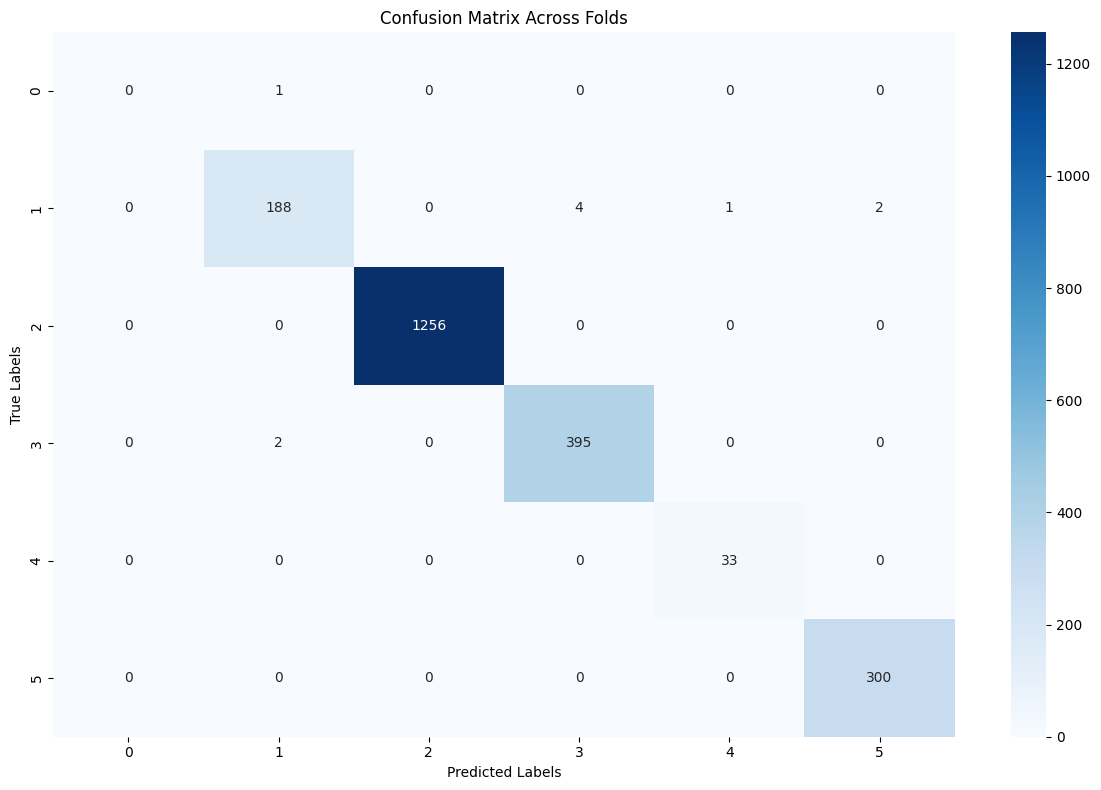

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming `fold_results` is a list of dictionaries containing confusion matrices for each fold
# Example structure:
# fold_results = [
#     {"confusion_matrix": cm_fold_1},
#     {"confusion_matrix": cm_fold_2},
#     ...
# ]

# Define the label range (0-5)
labels_range = list(range(6))  # Assuming 6 classes with numeric labels 0, 1, 2, 3, 4, 5

# Initialize a matrix to accumulate the confusion matrices
summed_cm = np.zeros((len(labels_range), len(labels_range)), dtype=int)

# Accumulate confusion matrices from each fold
for result in fold_results:
    summed_cm += np.array(result["confusion_matrix"])  # Add each fold's confusion matrix

# Plot the summed-up confusion matrix
plt.figure(figsize=(12, 8))  # Set figure size
sns.heatmap(
    summed_cm,
    annot=True,  # Annotate each cell with the corresponding value
    fmt='d',  # Integer format for summed values
    cmap='Blues',  # Color map
    xticklabels=labels_range,  # Numeric labels 0-5 for x-axis
    yticklabels=labels_range  # Numeric labels 0-5 for y-axis
)
plt.title( 'Confusion Matrix Across Folds')  # Set plot title
plt.xlabel('Predicted Labels')  # Label for x-axis
plt.ylabel('True Labels')  # Label for y-axis
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()  # Display the heatmap


**Advanced Prediction Function with Hierarchical Logic:**

In [19]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Function to get synonyms
def get_synonyms(words):
    # Placeholder function. Replace with an actual synonym-fetching mechanism.
    return list(set(words))  # Remove duplicates by converting to a set and back to list

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")  # Load tokenizer for model
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=6)  # Load pre-trained model for sequence classification with 6 labels

# Set device for model (using GPU if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Use GPU if available, otherwise CPU
model = model.to(device)  # Move model to the appropriate device (GPU or CPU)

# Define  Class labels for predictions
class_labels = {
    0: "अज्ञात",
    1: "अन्य",
    2: "कूल्हे से संबंधित विकार",
    3: "मस्कुलोस्केलेटल विकार",
    4: "रीढ़ से संबंधित विकार",
    5: "हड्डी से संबंधित विकार",
}

# Synonyms for spinal (रीढ़) related terms
रीढ़_keywords = get_synonyms([
    "रीढ़", "स्पाइनल", "कशेरुक", "मध्यकशेरुकी", "पृष्ठिका", "स्पाइनल डिस्क",
    "साइटिका", "रीड की हड्डी", "आर्थ्राइटिस", "पीठ", "पार्श्व दर्द", "रीड की जड़",
    "कमर", "नर्व दर्द", "टांगों में दर्द", "रिजलिंग", "स्पाइनल ऑस्टियोपोरोसिस", "कमर का दर्द", "स्पाइनल ट्यूमर", "स्पाइनल इंजरी", "स्पाइनल कॉर्ड", "हड्डी की समस्याएं",
    "पिठ दर्द", "स्पाइनल सर्जरी", "वर्टिब्रल", "नर्व रूट", "फ्रैक्चर रीढ़",
    "रीढ़ का मांसपेशी दर्द", "न्यूमेरिकल डिस्क", "स्नायविक दबाव", "स्पाइन संबंधी विकार"
])

# Synonyms for non-spinal (गैररीढ़) body parts
गैररीढ़_keywords = get_synonyms([
    "कलाई", "घुटना", "टखना", "कोहनी", "कंधा", "मांसपेशी", "स्नायु", "जांघ",
    "वक्ष", "पेट", "पैर की अंगुली", "घुटने के जोड़", "कंधे का जोड़", "संधि", "शरीर की संरचना",
    "कलाई में दर्द", "घुटने का जोड़", "हाथ की मांसपेशी", "कंधे का दर्द", "स्नायु सूजन",
    "घुटने का फ्रैक्चर", "पैर की मांसपेशी", "कोहनी में दर्द", "टांग में ऐंठन", "आर्म पेन",
    "पैर की मांसपेशी में ऐंठन", "कलाई में सूजन", "कोहनी का फ्रैक्चर", "कमर में खिंचाव",
    "स्नायु समस्याएं", "मांसपेशियों में दर्द", "स्नायु थकावट", "स्नायु का खिंचाव", "मांसपेशी समस्याएं"
])

# Synonyms for hip (कूल्हे) region and associated terms
कूल्हे_keywords = get_synonyms([
    "कूल्हा", "जांघ", "पेल्विस", "स्नायविक दर्द",  "कूल्हे का दर्द",
    "जांघ का दर्द", "पेल्विक डिसफंक्शन", "स्नायु का दर्द", "कूल्हे का फ्रैक्चर", "कूल्हे में सूजन", "जांघ का जोड़ों में दर्द", "पेल्विक समस्या",
    "कूल्हे की मांसपेशियों का दर्द", "कूल्हे की दर्दनाक स्थिति", "स्नायविक तंत्रिका दबाव",
    "पेल्विक ब्रेस्ट दर्द", "कूल्हे में जलन", "जांघ के निचले हिस्से में दर्द", "स्नायु तनाव",
     "पेल्विस फ्रैक्चर", "कूल्हे की जलन", "स्नायविक समस्याएं", "गुहिना में असुविधा","कूल्हे के क्षेत्र में दर्द", "कूल्हे की गति में प्रतिबंध", " कूल्हे की लचीलापन में कमी","कूल्हे के आसपास सूजन", "कूल्हे की गति में कठोरता","कूल्हे के जोड़ में दर्द",
     "कूल्हे की हड्डियों में कमजोरी","कूल्हे के जोड़ में सूजन","कूल्हे की मांसपेशियों में दर्द"," कूल्हे की गति में कमी"
])

# Synonyms for bone (हड्डी) and fractures
हड्डी_keywords = get_synonyms([
    "हड्डी", "ऑस्टियोपोरोसिस", "हड्डी टूटना", "हड्डी का फ्रैक्चर", "विस्थापन",
    "ऑस्टियोआर्थ्राइटिस", "हड्डी में दरार", "संकुचन", "हड्डी की शिथिलता", "कटी हड्डी",
    "हड्डी से जुड़ी समस्या", "हड्डी की चोट", "हड्डी में सूजन", "ऑस्टियोआर्थ्राइटिस", "हड्डी की ताकत", "बोन कंप्रेशन",
    "विस्थापन हड्डी", "हड्डी शिथिलता", "बोन फ्रैक्चर", "पार्श्व हड्डी", "हड्डी की समस्या", "हड्डी के जोड़ों का दर्द", "हड्डी का दर्द",
    "हड्डी का रक्तस्राव", "हड्डी का मोड़", "हड्डी की टूटन", "हड्डी का असंतुलन","हड्डियों में दर्द", "कमजोर हड्डियां"
])

# Synonyms for other conditions (अन्य)
अन्य_keywords = get_synonyms([
    "बुखार", "खांसी", "गले में खराश", "दस्त", "सिरदर्द", "थकान",
    "उल्टी", "चक्कर आना", "छाती में दर्द", "राश", "सूजन", "बार-बार पेशाब आना", "दर्दनाक पेशाब",
    "चिंता", "अवसाद", "नाक बहना", "सर्दी", "ठंड", "मलाशिया", "सूखी खांसी", "उत्पादक खांसी",
    "नाक बंद", "माइग्रेन", "कमजोरी", "फूलना", "सांस में दिक्कत", "बेहोशी",
    "झनझनाहट", "लालिमा", "जलन", "दर्द", "घबराहट", "साइनस रुकावट", "शरीर में ऐंठन",
    "सांस लेने में कठिनाई", "पसीना आना", "बढ़ी हुई हृदय गति", "थकावट", "वातावरण में बदलाव",
    "मानसिक दबाव", "हाथ और पैरों में सूजन", "सर्दी जुकाम", "अल्सर", "ब्लड प्रेशर", "वायरल बुखार", "एलर्जी", "नशे की आदत",
    "डिहाइड्रेशन", "पसीना आना", "वजन बढ़ना", "स्वास्थ्य में बदलाव", "फूड पॉयजनिंग",
    "माइग्रेन सिरदर्द", "अवसादग्रस्तता", "तनाव", "नींद में समस्या", "मूड स्विंग", "गर्मी के कारण कमजोरी",
    "अनिद्रा", "दिमागी तनाव", "आंतरिक सूजन", "हार्ट अटैक", "ब्लड क्लॉटिंग", "शारीरिक थकान",
    "वजन में कमी", "सपने में डर", "पेट फूलना", "अस्थमा", "एलर्जी बुखार", "चक्कर आना",
    "सांस में दिक्कत", "ज्यादा पसीना आना", "काँटने वाली समस्याएं"
])

# Correct spelling function (if needed)
def correct_spelling(text):
    # Add spell correction logic if necessary
    return text  # Placeholder for spell correction

# Prediction logic with improved flow
def predict_dynamic_batch_with_advanced_keywords_hindi(texts):
    # Step 1: Correct spelling for each input text
    corrected_texts = [correct_spelling(text) for text in texts]

    # Step 2: Tokenize the corrected texts for the model
    inputs = tokenizer(
        corrected_texts,
        return_tensors="pt",  # Return as PyTorch tensors
        truncation=True,  # Truncate texts to the maximum model length
        max_length=256,  # Set maximum length for input
        padding=True  # Pad the inputs to make them the same length
    ).to(device)  # Move inputs to the same device as the model

    # Step 3: Get predictions from the model
    with torch.no_grad():  # No need to calculate gradients
        outputs = model(**inputs)
        logits = outputs.logits  # Get logits from the output
        predicted_classes = torch.argmax(logits, dim=-1).cpu().numpy()  # Get the predicted class indices

    # Step 4: Map the predicted class indices to class labels
    predictions = [
        class_labels.get(cls, "अज्ञात") for cls in predicted_classes
    ]

    # Step 5: Refined Prediction Flow - Handle keyword checking more carefully
    for i, text in enumerate(corrected_texts):
        # Check for spinal-related keywords first
        if any(keyword in text for keyword in रीढ़_keywords):
            predictions[i] = "रीढ़ से संबंधित विकार"
        # Check for hip-related keywords
        elif any(keyword in text for keyword in कूल्हे_keywords):
            predictions[i] = "कूल्हे से संबंधित विकार"
        # Check for bone-related keywords
        elif any(keyword in text for keyword in हड्डी_keywords):
            predictions[i] = "हड्डी से संबंधित विकार"
        # Check for non-spinal body parts
        elif any(keyword in text for keyword in गैररीढ़_keywords):
            predictions[i] = "मस्कुलोस्केलेटल विकार"
        # Check for other conditions
        elif any(keyword in text for keyword in अन्य_keywords):
            predictions[i] = "अन्य"
        else:
            predictions[i] = "अज्ञात"

    # Return the predictions for all texts
    return predictions


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**Test Samples and Prediction Generation:**





In [20]:
# List of new Hindi text samples for prediction
new_samples = [
    "कमर में दर्द, गले में दर्द, हाथों और पैरों में झनझनाहट, पैरों में कमजोरी, नसों पर दबाव, पीठ में जकड़न।",
    "रीढ़ में दर्द, गर्दन के क्षेत्र में जकड़न, पैरों में थकावट, नसों पर दबाव, कमर में अकड़न।",
    "गर्दन में दर्द, पीठ में दर्द, अंगों में सुन्नपन, नसों पर दबाव, रीढ़ में जकड़न, झुकने में कठिनाई।",
    "रीढ़ में असुविधा, हाथों और पैरों में झनझनाहट, गति में कठिनाई, नसों पर दबाव।",
    "पीठ में जकड़न, गले में दर्द, पैरों में झनझनाहट, रीढ़ में दबाव का अहसास।",
    "कमर में दर्द, रीढ़ के निचले हिस्से में असुविधा, झुकने में कठिनाई, नसों का दबाव।",
    "कमर में दर्द, पीठ के निचले हिस्से में जकड़न, रीढ़ की हड्डी में असुविधा।",
    "रीढ़ में दर्द, गर्दन के क्षेत्र में खिंचाव, शरीर के निचले हिस्से में कमजोरी, नसों का दबाव।",
    "कमर के निचले हिस्से में दर्द, रीढ़ के क्षेत्र में जकड़न, लंबी दूरी चलने पर थकावट, नसों पर दबाव।",
    "कमर में दर्द, गर्दन में जकड़न, झनझनाहट का अहसास, निचले अंगों में थकावट, रीढ़ का दर्द, नसों का दबाव, कमर में जकड़न",
    "कमर में दर्द, गर्दन में जकड़न, हाथों या पैरों में झनझनाहट, पैरों में थकावट, रीढ़ की हड्डी में दर्द, नसों का दबाव, कमर में जकड़न",
    "कमर में दर्द, गले के क्षेत्र में दर्द, हाथों या पैरों में झनझनाहट, पैरों में कमजोरी, रीढ़ की हड्डी में दर्द, नसों का दबाव, कमर में जकड़न",
    "कमर में दर्द, गले के क्षेत्र में दर्द, हाथों या पैरों में झनझनाहट, पैरों में कमजोरी, रीढ़ की हड्डी में दर्द, नसों का दबाव, कमर में जकड़न"
    "इंगुहिना में असुविधा, कूल्हे की गति में प्रतिबंध, वजन सहने में कठिनाई, सीमित गति",
    "हड्डियों में कोमलता, हड्डी टूटने के लक्षण, हड्डियों में कठोरता और हड्डियों का कमजोर होना ये सभी हड्डी संबंधित समस्याओं के लक्षण हो सकते हैं।",
    "संधियों में असहजता, संधियों के आसपास सूजन, मांसपेशियों की थकान और गति में कमी ये सभी जोड़ और मांसपेशियों से संबंधित समस्याओं के लक्षण हो सकते हैं।",
    "बुखार के साथ गले में दर्द और कमजोरी हो रही है।",
    "जोड़ों में सूजन है और हल्का बुखार भी। है",
    "सिर में तेज दर्द और आंखों के पीछे दबाव महसूस हो रहा है।",
    "गर्दन में दर्द और ऊपर देखने में कठिनाई हो रही है।",
    "कमर में जकड़न और लंबे समय तक बैठने के बाद दर्द महसूस हो रहा है।",
     "हड्डियों में दर्द, कमजोर हड्डियां, और लचीलापन की कमी।",
     "रीढ़ में दर्द, गर्दन के क्षेत्र में दर्द और पैरों में थकावट।",
    "कूल्हे के क्षेत्र में दर्द, कूल्हे की गति में प्रतिबंध, चलने में कठिनाई, कूल्हे की लचीलापन में कमी",
    "संधियों में कठोरता, संधियों के आसपास सूजन, मांसपेशियों की थकान और गति में कठोरता ये सभी जोड़ और मांसपेशियों से संबंधित समस्याओं के लक्षण हो सकते हैं।",
    "गुदा में दर्द, कूल्हे की गति में प्रतिबंध, वजन सहन करने में कठिनाई, सीमित गति",
    "संधियों में दर्द, संधियों में सूजन, मांसपेशियों की थकान और स्वतंत्र रूप से हिलने-डुलने में कठिनाई ये सभी जोड़ और मांसपेशियों से संबंधित समस्याओं के लक्षण हो सकते हैं।",
    "कमर में दर्द, गले के क्षेत्र में दर्द, हाथों या पैरों में झनझनाहट, पैरों में कमजोरी, रीढ़ की हड्डी में दर्द, नसों का दबाव, कमर में जकड़न",
    "रीढ़ में दर्द, गर्दन के क्षेत्र में दर्द, अंगों में सुन्नपन, पैरों में कमजोरी, रीढ़ का दर्द, नसों का दबाव, कमर में जकड़न।",
    "कमर में दर्द, गर्दन में जकड़न, झनझनाहट का अहसास, निचले अंगों में थकावट, रीढ़ का दर्द, नसों का दबाव, कमर में जकड़न",
    "कमर में दर्द, गले के क्षेत्र में दर्द, हाथों या पैरों में झनझनाहट, पैरों में कमजोरी, रीढ़ की हड्डी में दर्द, नसों का दबाव, कमर में जकड़न",
   "पीठ में जकड़न, गर्दन के क्षेत्र में दर्द, झनझनाहट का अहसास, पैरों में थकावट, रीढ़ का दर्द, नसों का दबाव, कमर में जकड़न।",
    "रीढ़ की हड्डी में दर्द, कमर में अकड़न, हाथों और पैरों में झनझनाहट, झुकने में कठिनाई",
    "कमर के निचले हिस्से में दर्द, रीढ़ के क्षेत्र में जकड़न, लंबे समय तक खड़े रहने पर दर्द",
    "गर्दन के क्षेत्र में अकड़न, सिर घुमाने में कठिनाई, गर्दन में तेज दर्द",
    "कंधों में जकड़न, पीठ में दर्द, हाथों में कमजोरी, लंबी दूरी चलने में कठिनाई",
    "कूल्हे के जोड़ में दर्द, उठने-बैठने में समस्या, कूल्हे की गति में कमी",
    "रीढ़ में सूजन, पीठ के मध्य क्षेत्र में दर्द, लंबे समय तक बैठने के बाद असुविधा",
    "पैरों में कमजोरी, लंबे समय तक चलने पर थकावट, घुटनों में झनझनाहट",
    "कमर के क्षेत्र में दबाव महसूस होना, झुकने और मुड़ने में कठिनाई",
    "गर्दन और कंधों में दर्द, मांसपेशियों की कठोरता, अचानक तेज दर्द का अहसास",
    "कूल्हे के आसपास सूजन, वजन उठाने में कठिनाई, कूल्हे की गति में कठोरता",
    "रीढ़ के निचले हिस्से में दर्द, नसों का दबाव, पैर सुन्न हो जाना",
    "पीठ के निचले हिस्से में भारीपन, लंबे समय तक खड़े रहने के बाद दर्द",
    "कमर में अकड़न, घुटनों में दर्द, रीढ़ के चारों ओर जकड़न",
    "कूल्हे की हड्डियों में कमजोरी, जोड़ों में दर्द, कूल्हे के जोड़ में सूजन",
    "रीढ़ की हड्डी में खिंचाव का अहसास, मांसपेशियों में थकावट, कमर का दर्द",
    "घुटनों और कूल्हों में दर्द, जोड़ों में जकड़न, चलने में कठिनाई",
    "रीढ़ के ऊपरी हिस्से में दर्द, गर्दन में दबाव महसूस होना, सिर झुकाने में समस्या",
    "कूल्हे की मांसपेशियों में दर्द, लंबी दूरी तक चलने के बाद कमजोरी",
    "कमर के मध्य क्षेत्र में दर्द, रीढ़ के आसपास सूजन, पैर सुन्न हो जाना",
    "रीढ़ के जोड़ों में असुविधा, कूल्हे की गति में प्रतिबंध, वजन सहने में समस्या",
    "मांसपेशियों में खिंचाव, पीठ के निचले हिस्से में थकावट, चलने में दिक्कत",
    "कंधों में जकड़न, मांसपेशियों में ऐंठन, गर्दन के क्षेत्र में दर्द",
    "कूल्हे के जोड़ में कठोरता, जोड़ों के आसपास सूजन, चलने-फिरने में कठिनाई",
    "रीढ़ के क्षेत्र में मांसपेशियों का खिंचाव, नसों का दबाव, पैरों में थकावट",
    "कमर में तेज दर्द, गले में अकड़न, रीढ़ के निचले हिस्से में असुविधा",
    "पैरों में झनझनाहट, रीढ़ के जोड़ में दर्द, मांसपेशियों की कमजोरी",
    "गर्दन में सूजन, सिर घुमाने में कठिनाई, कंधों में भारीपन",
    "पीठ में दर्द, गर्दन में जकड़न, रीढ़ के ऊपरी हिस्से में खिंचाव का अहसास",
    "कमर के निचले हिस्से में दबाव महसूस होना, मांसपेशियों में थकावट",
    "रीढ़ की हड्डी में कठोरता, पैरों में झनझनाहट, हाथों में सुन्नपन",
    "कूल्हे में दर्द, मांसपेशियों की ऐंठन, जोड़ों के आसपास सूजन",
    "पीठ के निचले हिस्से में दर्द, लंबी दूरी चलने पर थकावट, रीढ़ का असंतुलन",
    "बुखार और कंपकंपी, पूरे शरीर में कमजोरी, भूख में कमी",
    "सिर में तेज दर्द, आंखों के पीछे दबाव, मतली और उल्टी",
    "गले में सूजन, बुखार और निगलने में दर्द, कमजोरी महसूस होना",
    "जोड़ों में दर्द, मांसपेशियों में ऐंठन, शरीर के विभिन्न हिस्सों में सूजन",
    "हल्का बुखार, सिर भारी लगना, थकावट और चिड़चिड़ापन",
    "घुटनों में दर्द, पैरों में सूजन, खड़े होने में कठिनाई",
    "कमर में जकड़न, पेट में ऐंठन, उठने-बैठने में दर्द",
    "सांस लेने में कठिनाई, सीने में भारीपन, बुखार के साथ थकावट",
    "कमजोरी के साथ हल्का बुखार, जोड़ों में सूजन",
    "सिरदर्द, आंखों में जलन, गर्दन में कठोरता",
    "बदन दर्द, भूख कम लगना, थकावट और सुस्ती",
    "बुखार, सर्दी, शरीर में दर्द और हल्का कंपकंपी",
    "हाथ और पैरों में सूजन, चलने-फिरने में दर्द, वजन उठाने में दिक्कत"
]

# Perform predictions on the new Hindi text samples
predictions = predict_dynamic_batch_with_advanced_keywords_hindi(new_samples)

# Print the predictions with the corresponding input text
for text, category in zip(new_samples, predictions):
    # Display each input text with its predicted category
    print(f"Input: {text}\nPredicted Category: {category}\n")

Input: कमर में दर्द, गले में दर्द, हाथों और पैरों में झनझनाहट, पैरों में कमजोरी, नसों पर दबाव, पीठ में जकड़न।
Predicted Category: रीढ़ से संबंधित विकार

Input: रीढ़ में दर्द, गर्दन के क्षेत्र में जकड़न, पैरों में थकावट, नसों पर दबाव, कमर में अकड़न।
Predicted Category: रीढ़ से संबंधित विकार

Input: गर्दन में दर्द, पीठ में दर्द, अंगों में सुन्नपन, नसों पर दबाव, रीढ़ में जकड़न, झुकने में कठिनाई।
Predicted Category: रीढ़ से संबंधित विकार

Input: रीढ़ में असुविधा, हाथों और पैरों में झनझनाहट, गति में कठिनाई, नसों पर दबाव।
Predicted Category: रीढ़ से संबंधित विकार

Input: पीठ में जकड़न, गले में दर्द, पैरों में झनझनाहट, रीढ़ में दबाव का अहसास।
Predicted Category: रीढ़ से संबंधित विकार

Input: कमर में दर्द, रीढ़ के निचले हिस्से में असुविधा, झुकने में कठिनाई, नसों का दबाव।
Predicted Category: रीढ़ से संबंधित विकार

Input: कमर में दर्द, पीठ के निचले हिस्से में जकड़न, रीढ़ की हड्डी में असुविधा।
Predicted Category: रीढ़ से संबंधित विकार

Input: रीढ़ में दर्द, गर्दन के क्षेत्र में खिंचाव, शरीर के नि

In [22]:
# Example predictions
new_samples = [
    "कमर में दर्द, गले में दर्द, हाथों और पैरों में झनझनाहट, पैरों में कमजोरी, नसों पर दबाव, पीठ में जकड़न।",
    "रीढ़ में दर्द, गर्दन के क्षेत्र में जकड़न, पैरों में थकावट, नसों पर दबाव, कमर में अकड़न।",
    "गर्दन में दर्द, पीठ में दर्द, अंगों में सुन्नपन, नसों पर दबाव, रीढ़ में जकड़न, झुकने में कठिनाई।",
    "रीढ़ में असुविधा, हाथों और पैरों में झनझनाहट, गति में कठिनाई, नसों पर दबाव।",
    "पीठ में जकड़न, गले में दर्द, पैरों में झनझनाहट, रीढ़ में दबाव का अहसास।",
    "कमर में दर्द, रीढ़ के निचले हिस्से में असुविधा, झुकने में कठिनाई, नसों का दबाव।",
    "कमर में दर्द, पीठ के निचले हिस्से में जकड़न, रीढ़ की हड्डी में असुविधा।",
    "रीढ़ में दर्द, गर्दन के क्षेत्र में खिंचाव, शरीर के निचले हिस्से में कमजोरी, नसों का दबाव।",
    "कमर के निचले हिस्से में दर्द, रीढ़ के क्षेत्र में जकड़न, लंबी दूरी चलने पर थकावट, नसों पर दबाव।",
    "कमर में दर्द, गर्दन में जकड़न, झनझनाहट का अहसास, निचले अंगों में थकावट, रीढ़ का दर्द, नसों का दबाव, कमर में जकड़न।",
    "हड्डियों में कोमलता, हड्डी टूटने के लक्षण, हड्डियों में कठोरता और हड्डियों का कमजोर होना ये सभी हड्डी संबंधित समस्याओं के लक्षण हो सकते हैं।",
    "हड्डियों में दर्द, कमजोर हड्डियां, और लचीलापन की कमी।",
    "हड्डी की जकड़न, हड्डी में दबाव का अहसास, और असामान्य दर्द महसूस हो रहा है।",
    "इंगुहिना में असुविधा, कूल्हे की गति में प्रतिबंध, वजन सहने में कठिनाई, सीमित गति।",
    "कूल्हे के क्षेत्र में दर्द, कूल्हे की गति में प्रतिबंध, चलने में कठिनाई, कूल्हे की लचीलापन में कमी।",
    "गुदा में दर्द, कूल्हे की गति में प्रतिबंध, वजन सहन करने में कठिनाई, सीमित गति।",
    "कूल्हे के जोड़ में दर्द, उठने-बैठने में समस्या, कूल्हे की गति में कमी।",
    "कूल्हे के आसपास सूजन, वजन उठाने में कठिनाई, कूल्हे की गति में कठोरता।",
    "कूल्हे की हड्डियों में कमजोरी, जोड़ों में दर्द, कूल्हे के जोड़ में सूजन।",
    "कूल्हे के जोड़ में कठोरता, जोड़ों के आसपास सूजन, चलने-फिरने में कठिनाई।",
    "कूल्हे के जोड़ में दर्द, मांसपेशियों की ऐंठन, जोड़ों के आसपास सूजन।",
    "कूल्हे में दर्द, मांसपेशियों की ऐंठन, जोड़ों के आसपास सूजन।",
    "कूल्हे के जोड़ में दर्द, उठने-बैठने में समस्या, कूल्हे की गति में कमी।",
    "मुझे बुखार और खांसी हो रही है।"
    "आपको बुखार, दस्त और उल्टी आ रही है।"
]

# Perform predictions on the new Hindi text samples
predictions = predict_dynamic_batch_with_advanced_keywords_hindi(new_samples)

# Print the predictions with the corresponding input text
for text, category in zip(new_samples, predictions):
    # Display each input text with its predicted category
    print(f"Input: {text}\nPredicted Category: {category}\n")

Input: कमर में दर्द, गले में दर्द, हाथों और पैरों में झनझनाहट, पैरों में कमजोरी, नसों पर दबाव, पीठ में जकड़न।
Predicted Category: रीढ़ से संबंधित विकार

Input: रीढ़ में दर्द, गर्दन के क्षेत्र में जकड़न, पैरों में थकावट, नसों पर दबाव, कमर में अकड़न।
Predicted Category: रीढ़ से संबंधित विकार

Input: गर्दन में दर्द, पीठ में दर्द, अंगों में सुन्नपन, नसों पर दबाव, रीढ़ में जकड़न, झुकने में कठिनाई।
Predicted Category: रीढ़ से संबंधित विकार

Input: रीढ़ में असुविधा, हाथों और पैरों में झनझनाहट, गति में कठिनाई, नसों पर दबाव।
Predicted Category: रीढ़ से संबंधित विकार

Input: पीठ में जकड़न, गले में दर्द, पैरों में झनझनाहट, रीढ़ में दबाव का अहसास।
Predicted Category: रीढ़ से संबंधित विकार

Input: कमर में दर्द, रीढ़ के निचले हिस्से में असुविधा, झुकने में कठिनाई, नसों का दबाव।
Predicted Category: रीढ़ से संबंधित विकार

Input: कमर में दर्द, पीठ के निचले हिस्से में जकड़न, रीढ़ की हड्डी में असुविधा।
Predicted Category: रीढ़ से संबंधित विकार

Input: रीढ़ में दर्द, गर्दन के क्षेत्र में खिंचाव, शरीर के नि